# 컨테이너 야드 내 혼잡도 및 대기 Queue 분석 보고서

시뮬레이션은 주어진 수의 트럭을 처리하고, 이들 각각에 대해 처리 시간 및 사용 가능한 블록을 고려하여 동작합니다. 트럭은 각자의 도착 시간에 따라 시스템에 도착하고, 트럭이 작업을 수행하기 위해 선택한 블록에 따라 기다릴 수도 있고, 바로 작업을 시작할 수도 있습니다. 이 모든 과정은 시뮬레이션에서 추적되며, 결과는 최종 보고서에 기록됩니다.

이 시뮬레이션의 목표는 주어진 조건 하에서 트럭 터미널 운영의 복잡성을 이해하고, 어떤 변수가 시스템 성능에 영향을 미치는지 파악하는 것입니다. 이를 통해 최적의 운영 전략을 도출하거나, 새로운 정책이나 조치가 터미널 운영에 어떤 영향을 미칠지 예측할 수 있습니다.

- 컨테이너 야드 내 요인을 반영한 시뮬레이션 생성 및 Queue 최적화
- 머신러닝을 통한 컨테이너 야드 내 요인 가중치 학습 및 미래 Queue 예측

> chapter01

### 컨테이너 야드 내 요인을 반영한 시뮬레이션 생성 및 Queue 최적화

In [1]:
import simpy 
import random
import csv

- 사용자 입력값 : 차량수, 실행시간, 작업장수(반입, 반출)
- 입력방법 : 웹 화면 내 작성

In [7]:
# 웹 화면에서 입력받는 설정값(차량수, 실행시간, 블록수)
trucknum = 1000
processtime = 2880
blocknum = 5

- 입력값 및 컨테이너 야드 내 요인을 반영한 시뮬레이션 생성
    - 요인 : 작업코드, 컨테이너 코드, 컨테이너 사이즈, 반출입 작업장, 작업시간 등

In [ ]:
for i in range(trucknum):
    Truck(env, i+1, arrival_interval, unload_trucks_completed, load_trucks_completed, unload_load_trucks_completed, operation
        , unload_spot, load_spot, end_wait_start_unload_work, end_wait_start_load_work, visible, container_status, container_size)

env.run(until=processtime)

for block in range(blocknum):
    unload_spot[block] = simpy.Resource(env, capacity=1)

- 차량의 작업장(블록) 배정 최적화를 통한 Queue 최소화 방법
    - 현재 차량 작업장(블록) 배정 시 직전 차량이 배정된 작업장(블록) 제외
    - 차량 입차 시 대기차량 및 작업차량 수가 가장 적은 작업장(블록)으로 배정

| 구분 | 최적화 전 | 최적화 후 | 감소율 |
| -------- | -------- | -------- | -------|
| 야드 내 머문 시간(분)    | 60020   | 52487   |  13%  |
| 작업장에서 대기한 시간(분)    | 28230   | 20360   |  28%   |


In [ ]:
if select_operation == 'unload':
    ## 대기차량 및 작업 차량 수가 가장 적은 블록으로 할당(최적화)
    min_unload_spots = []
    min_load_spots = []
    for spot, resource in self.unload_spot.items():
        if spot != before_unload:
            if (len(resource.queue)+resource.count)  < min_unload:
                min_unload = (len(resource.queue)+resource.count)
                # 바로 직전에 할당한 블록 제외(최적화)
                min_unload_spots.append(spot)
            elif (len(resource.queue)+resource.count) == min_unload:
                min_unload_spots.append(spot)

    for spot, resource in self.load_spot.items():
        if spot != before_load:
            if (len(resource.queue)+resource.count)  < min_load:
                min_load = (len(resource.queue)+resource.count)
                min_load_spots.append(spot)
            elif (len(resource.queue)+resource.count) == min_load:
                min_load_spots.append(spot)

    assigned_unload_spot = random.choice(min_unload_spots)
    before_unload = assigned_unload_spot
    assigned_load_spot = random.choice(min_load_spots)
    before_load =  assigned_load_spot
    print(f"트럭 {self.name}이(가) {assigned_unload_spot} 블록으로 배정되습니다.")

> chapter02

### 머신러닝을 통한 컨테이너 야드 내 요인 가중치 학습 및 미래 Queue 예측

- 데이터 전처리
    - 문자열 숫자화
    - 새로운 피처 생성(야드 내 차량 수)
    - 데이터 분할
    - 데이터 정규화

In [ ]:
data['op'] = data['op'].replace({'unload':1, 'load':2, 'both':3})
data['container_status'] =data['container_status'].replace({'fresh':1, 'short-term':2, 'long-term':3})
data['container_size'] = data['container_size'].replace({'small':1, 'medium':2, 'large':3})
in_time_value1 = list(filter(lambda y : y<int_index_time, index_times_list))
# 현재 시간보다 출차를 빨리한 차량 대수
in_time_value2 = list(filter(lambda x: x< int_in_time, out_times_list))
# 현재 터미널 내 트럭 대수 = 총 트럭 - 출차 대수(본인 트럭 제외)
In_yard_truck_volume = len(in_time_value1)-len(in_time_value2)
train_size = int(len(X) * 0.8)

# 시간 순서를 유지하면서 데이터 분할
X_train, X_test = X[:train_size, :], X[train_size:, :]
y_train, y_test = y[:train_size], y[train_size:]

scaler = MinMaxScaler()
X_train_scaled = np.zeros_like(X_train)
X_test_scaled = np.zeros_like(X_test)

for i in range(X_train.shape[2]):
    X_train_scaled[:, :, i] = scaler.fit_transform(X_train[:, :, i])
    X_test_scaled[:, :, i] = scaler.transform(X_test[:, :, i])

- 머신러닝 학습 모델 구성
    - XGBoost
    - RandomForest
    - RNN
    - CNN

In [ ]:
# XGBoost regressor 모델
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)

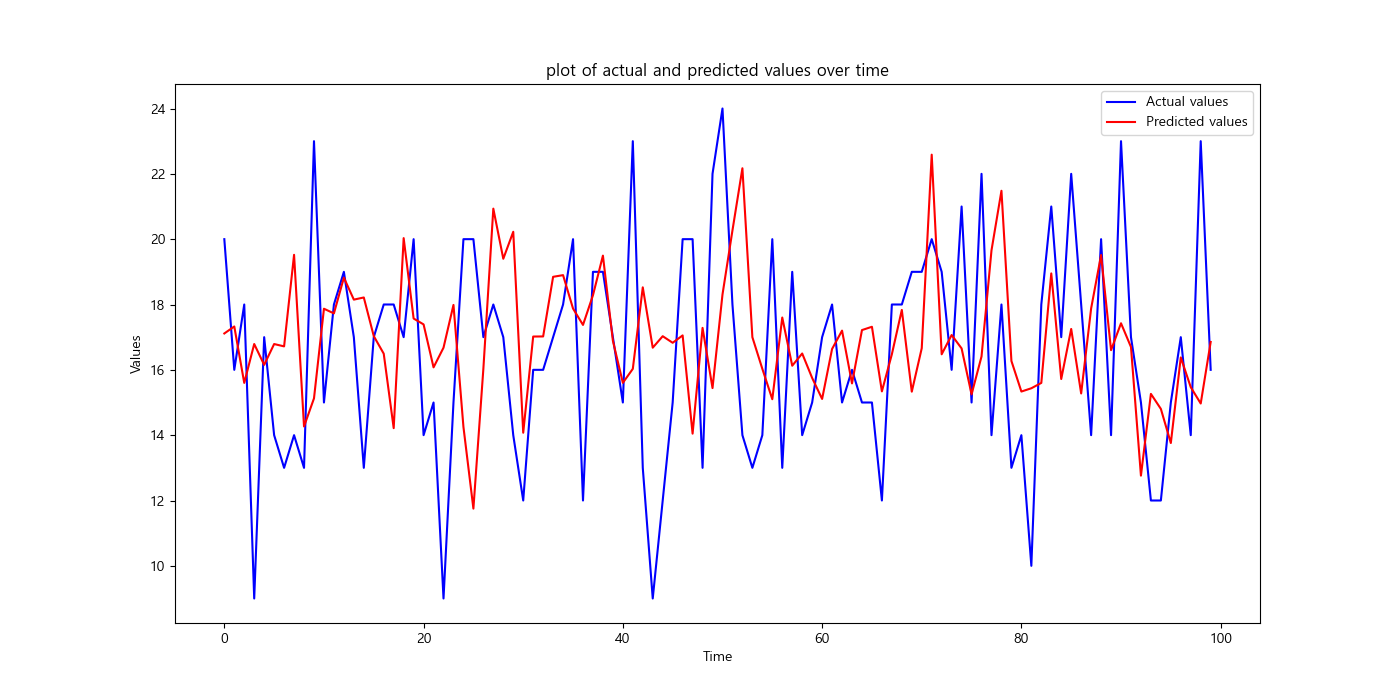

###### R-squared : 64% 정도의 정확도 나타나고 있으며, 파라미터 수정에 따른 정확도 향상 보이지 않음. 시뮬레이션 내 추가 피처 생성(실제 데이터 반영한)이 필요하거나 차량 수를 현재 1,000대에서 10,000대 이상으로 늘려보는 것 등을 시도해 볼 필요가 있음

In [ ]:
# 랜덤 포레스트 모델 생성
model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features='auto')

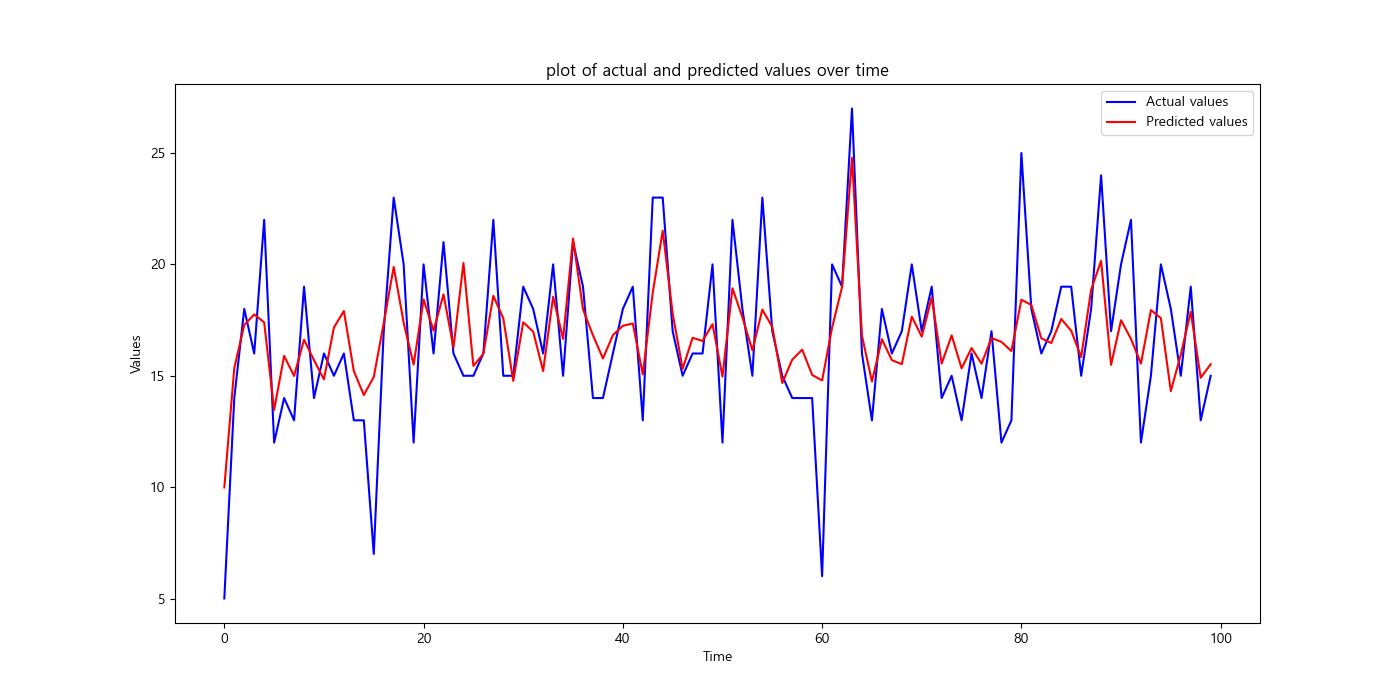

###### XGBOOST 모델과 거의 동일한 결과를 보임. R-squared 64% 정도의 정확도 나타나고 있으며, 파라미터 수정에 따른 정확도 향상 보이지 않음. 시뮬레이션 내 추가 피처 생성(실제 데이터 반영한)이 필요하거나 차량 수를 현재 1,000대에서 10,000대 이상으로 늘려보는 것 등을 시도해 볼 필요가 있음.

In [ ]:
# CNN 모델
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

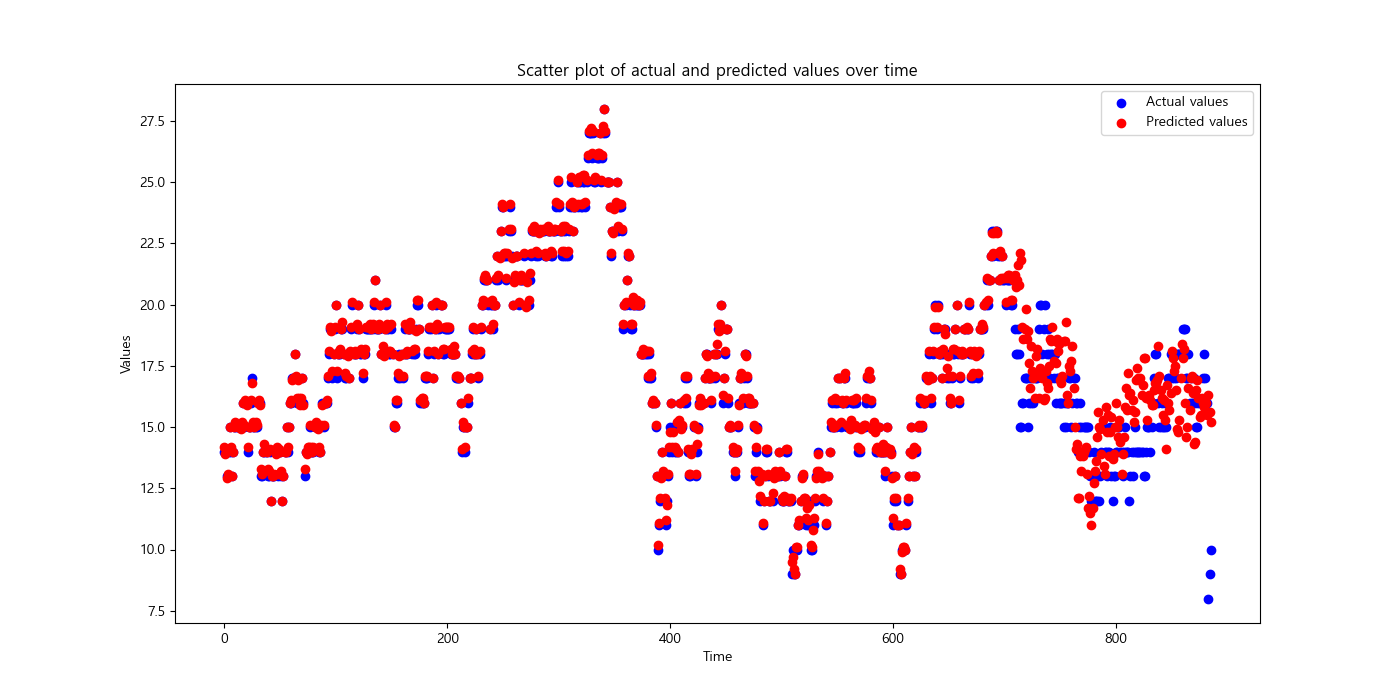

 ###### 학습할 데이터를 train_data와 teat_data로 시계열로 나누어 학습한 결과, train_data(0~80)는 98% 이상의 정확도를 나타내는 결과가 나와 과적합임을 알 수 있음. test_data(81~100)은 실제 값과 예측 값의 차이를 절대값으로 변환하여 평균을 나타내는 MAE 값이 1.54로 나타남

In [ ]:
# LSTM 모델
model = keras.Sequential()
model.add(keras.layers.LSTM(units=64, input_shape=(lookback, X_train.shape[-1])))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dense(units=1))

비교 표

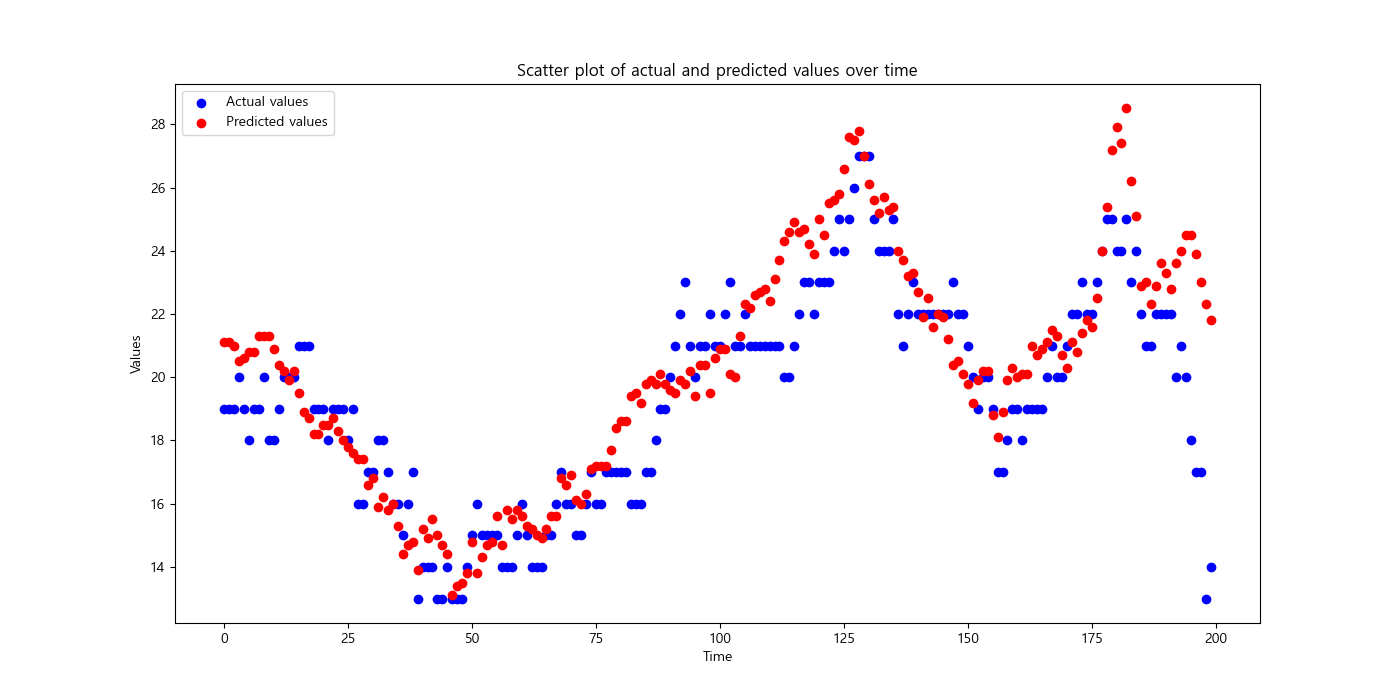

## 예측결과 평가

Train MAE: 0.66151342445876, Test MAE: 1.496621336470643<br/>
Train MSE: 0.6856522407125203, Test MSE: 3.5195947425499243<br/>
Train RMSE: 0.8280412071343553, Test RMSE: 1.876058299347311<br/>
Train R^2: 0.9523614804964758, Test R^2: 0.7459890555940416<br/>
 
 ###### 학습할 데이터를 train_data와 teat_data로 시계열로 나누어 학습한 결과, train_data와 Test_data의 R^2 결과값이 각 95%, 71% 로 현재 반영한 요인에 의한 학습 효과가 있다고 판단하였음. 이에 정확도를 향상하기 위해 파라미터 변경, 데이터 추가의 조치를 함.